# Ejercicio 4
4- Realice una registración basada en características, otra con CCN y otra con MI de la imágenes
contenidas en “PAIByB-7”, evaluando los resultados con las métricas de la GUIA I ¿Qué
conclusiones puede sacar al respecto? Comparar los resultados entre sí.

In [9]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from registration import Imagen, Registracion

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Antes de comenzar, se aclara que se utilizaran las versiones denoiseadas de las imágenes, ya que se obtienen mejores resultados en la registración.

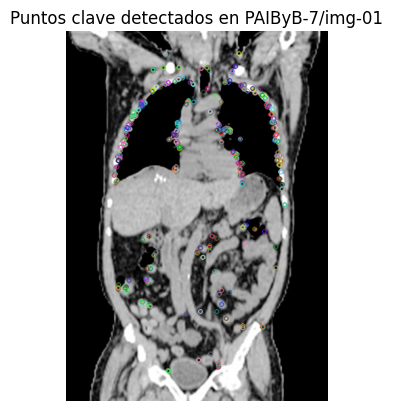

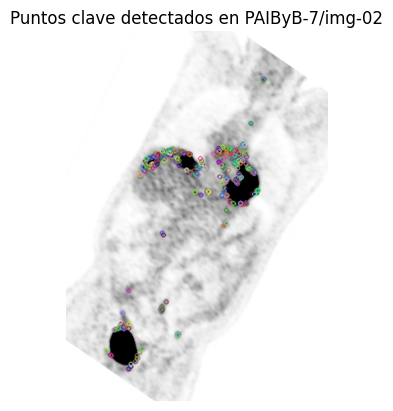

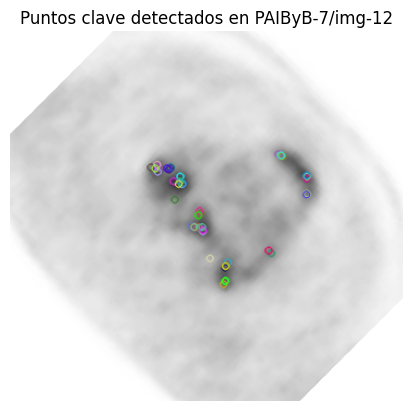

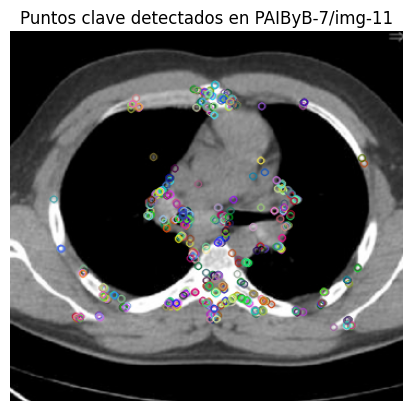

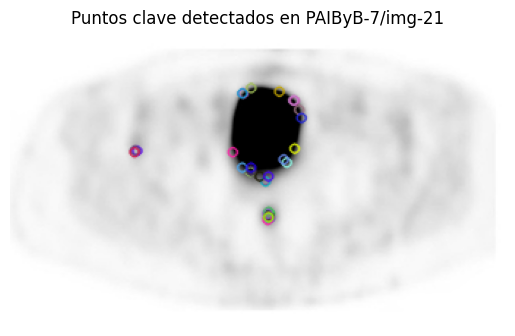

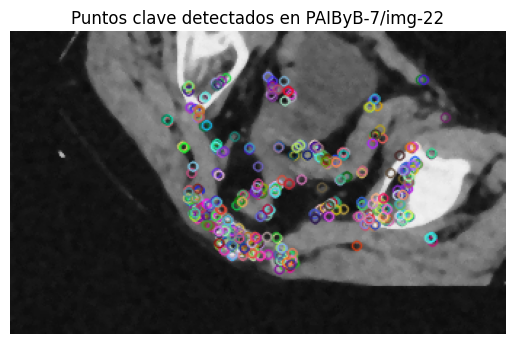

In [45]:
base_dir = 'PAIByB-7'
reg_pairs = {f"{base_dir}/img-{i}{i%2+1}.tif": f"{base_dir}/img-{i}{(i+1)%2+1}.tif" for i in range(3)}
img_obj_pairs = []

for img1, img2 in reg_pairs.items():
    im1 = Imagen(img1, feature_extractor='orb')
    im1.mostrar_puntos_clave()
    im2 = Imagen(img2, feature_extractor='sift')
    # Invertimos la imagen y recalculamos los puntos clave
    #im2.imagen = 255 - im2.imagen
    #im2.extraer_puntos_clave()
    im2.mostrar_puntos_clave()
    img_obj_pairs.append((im1, im2))

# Registración basada en características por SIFT

In [34]:
img_raw_pairs = [(im1.imagen, im2.imagen) for im1, im2 in img_obj_pairs]

def processImg(img):
    img_invert = np.uint8(255*np.ones(np.shape(img))-0.7*img)
    img_resta = cv2.absdiff(img,np.uint8(1.6*img_invert))
    img_invert = np.uint8(255*np.ones(np.shape(img_resta))-0.7*img_resta)
    
    return img_invert

img_raw_pairs[0] = (img_raw_pairs[0][0], processImg(img_raw_pairs[0][1]))
img_raw_pairs[1] = (processImg(img_raw_pairs[1][0]), img_raw_pairs[1][1])
img_raw_pairs[2] = (processImg(img_raw_pairs[2][0]), img_raw_pairs[2][1])

Matches encontrados: 10


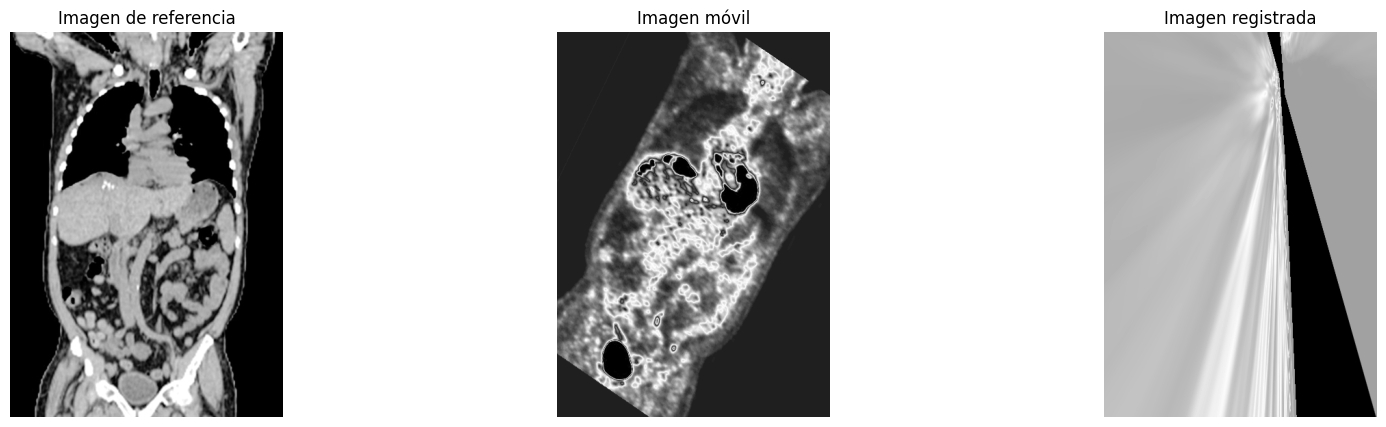

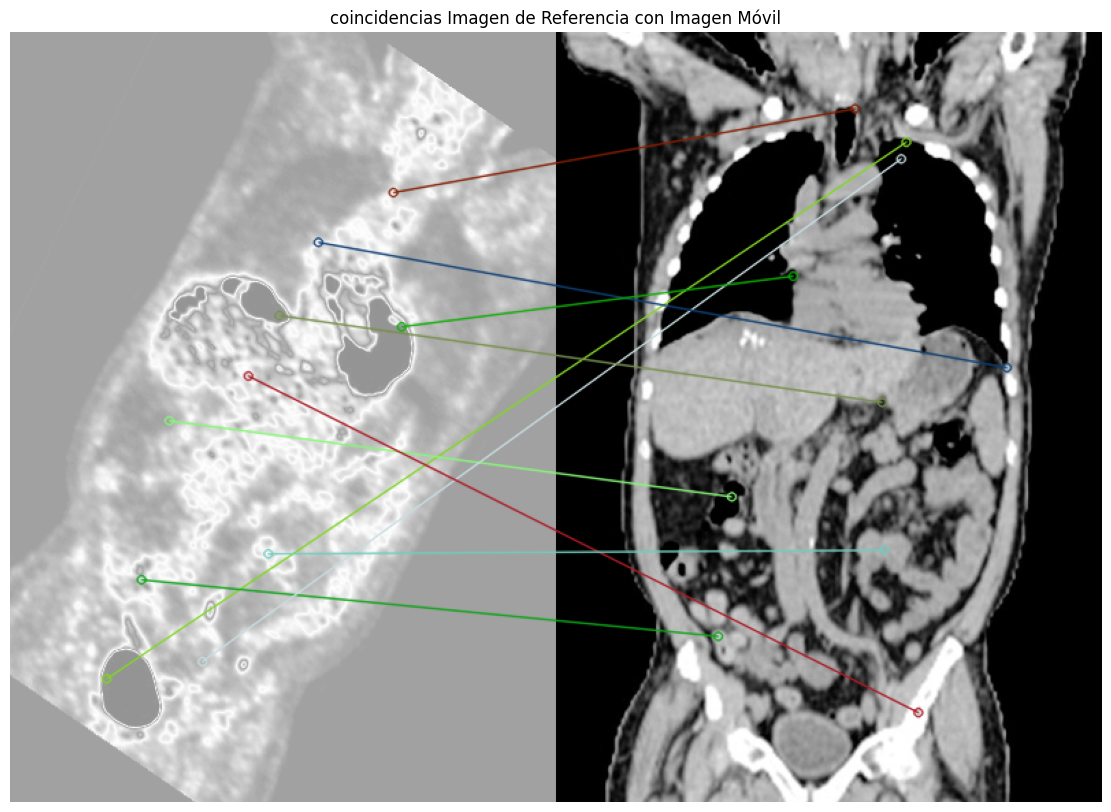

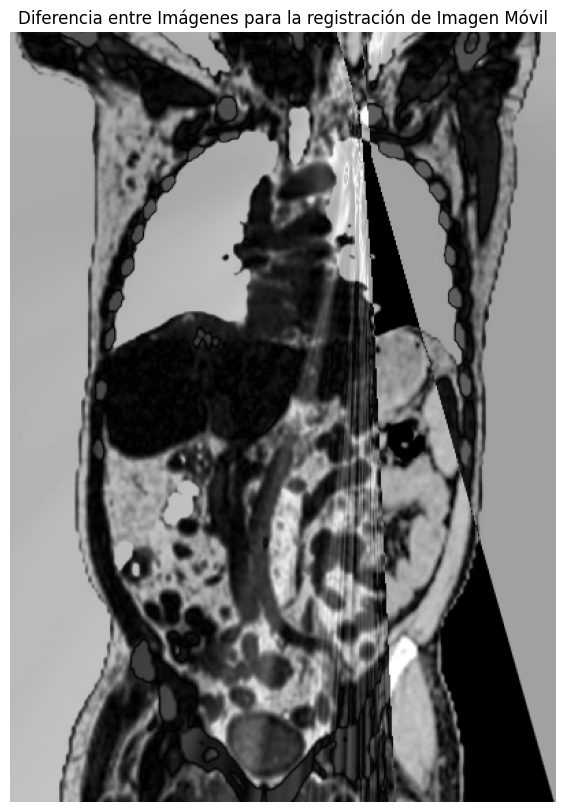

SSIM: 0.1572
MSE: 95.7204
PSNR: 65.2110
SSIM: 0.1572
MSE: 95.7204
PSNR: 65.2110
Matches encontrados: 20


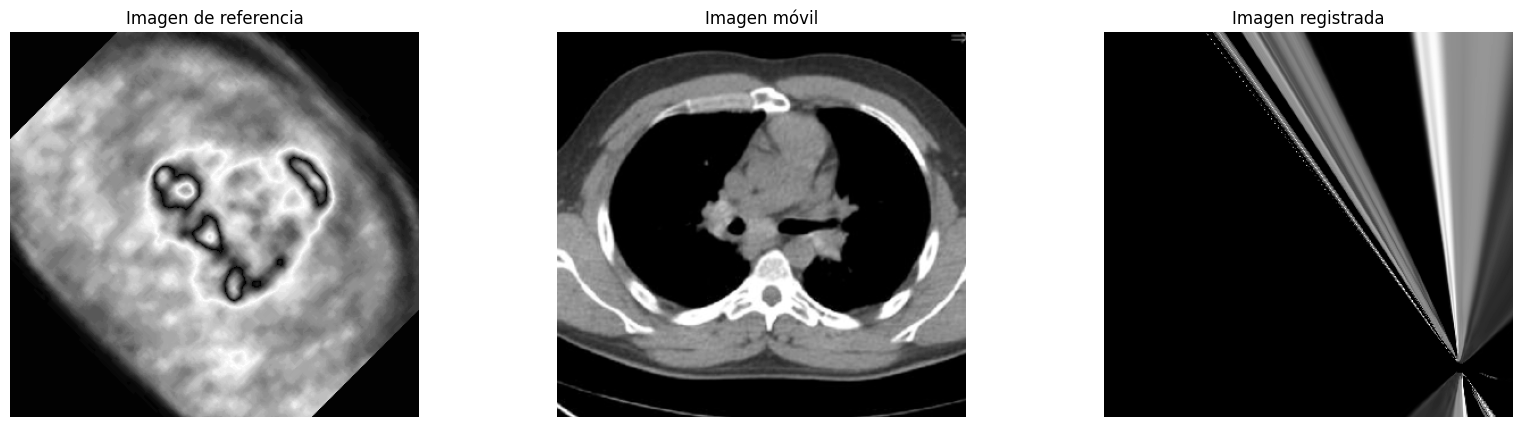

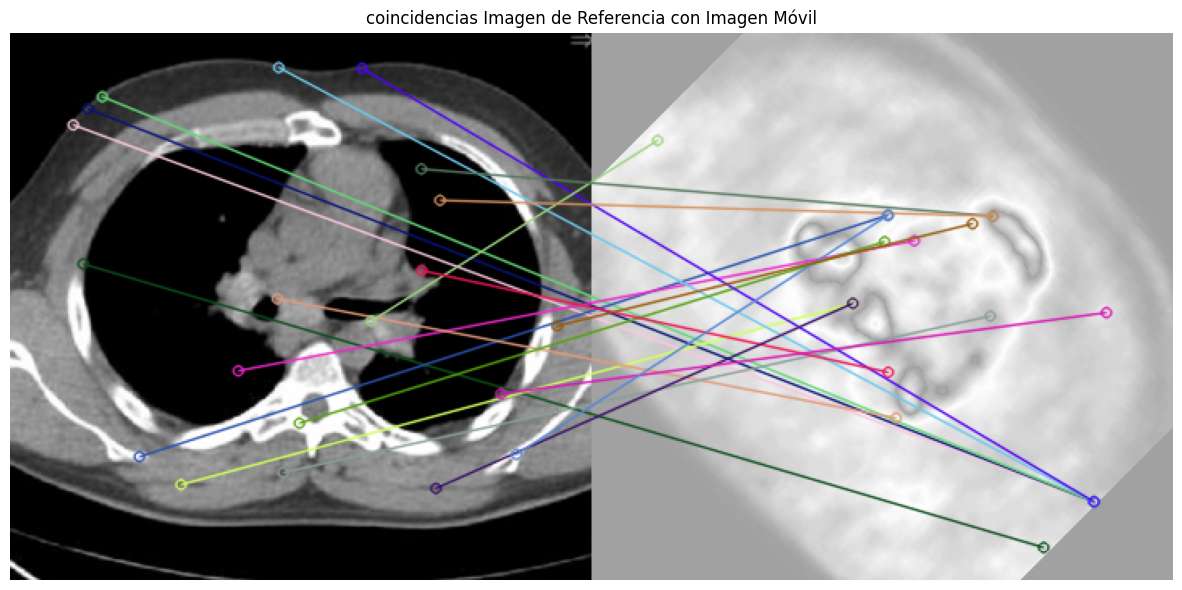

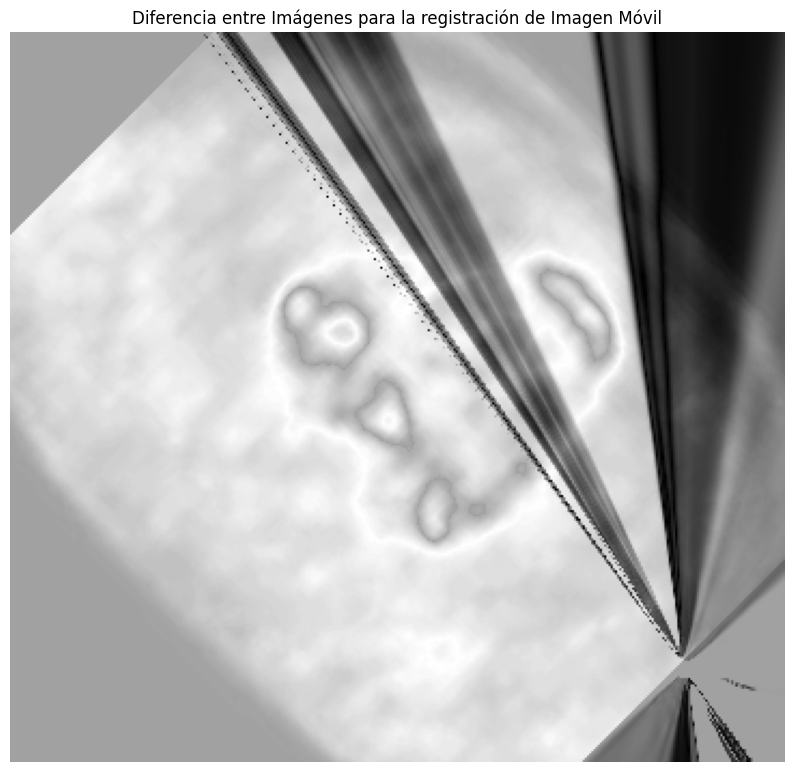

SSIM: 0.0843
MSE: 106.6326
PSNR: 64.1314
SSIM: 0.0843
MSE: 106.6326
PSNR: 64.1314
Matches encontrados: 18


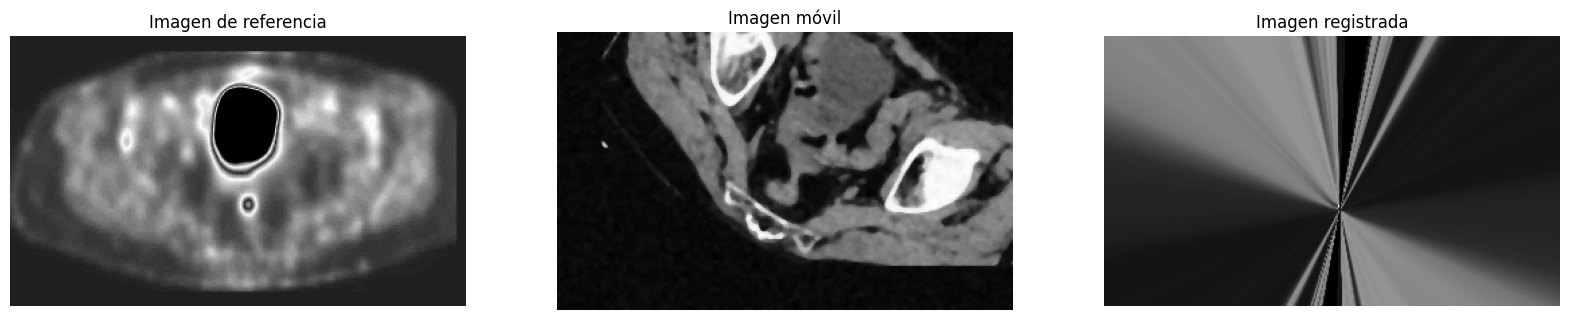

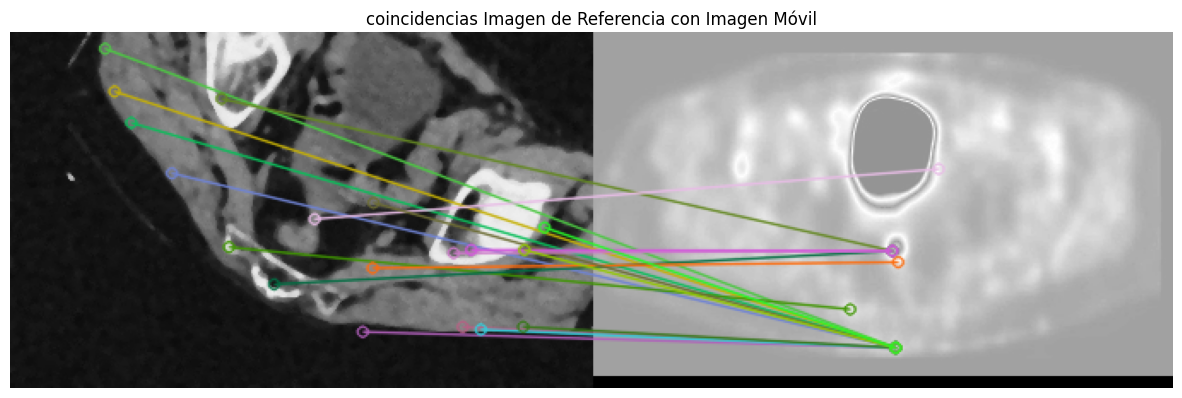

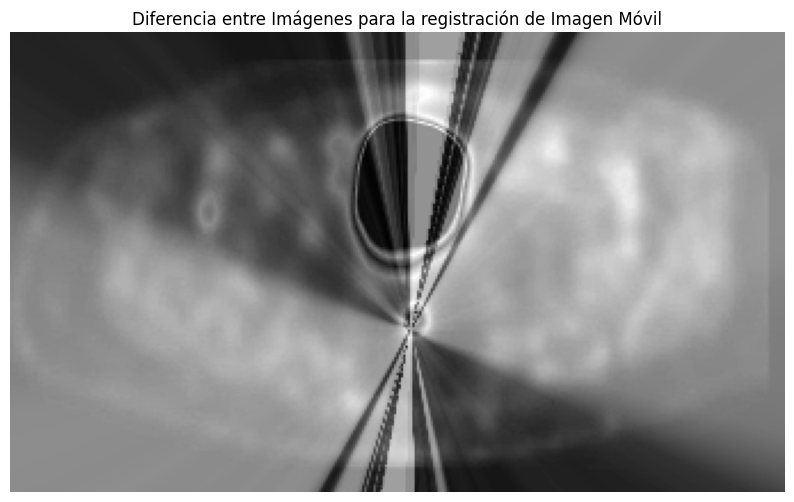

SSIM: 0.3176
MSE: 118.8192
PSNR: 63.0492
SSIM: 0.3176
MSE: 118.8192
PSNR: 63.0492


In [51]:
# Registración basada en características
for i, tup in enumerate(img_raw_pairs):
    reg = Registracion(tup[0], tup[1], modo='features', min_match_count=4, lowe_threshold=0.8, ransac_thres=5)
    reg.ejecutar_registracion(plot=True)
    reg.calcular_metricas()

## Registración basada en CCN


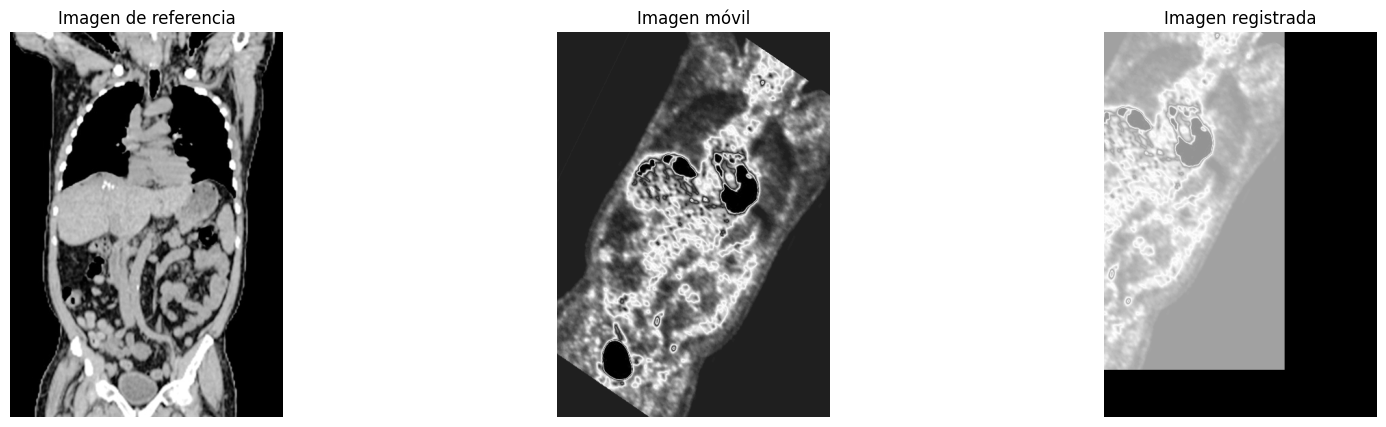

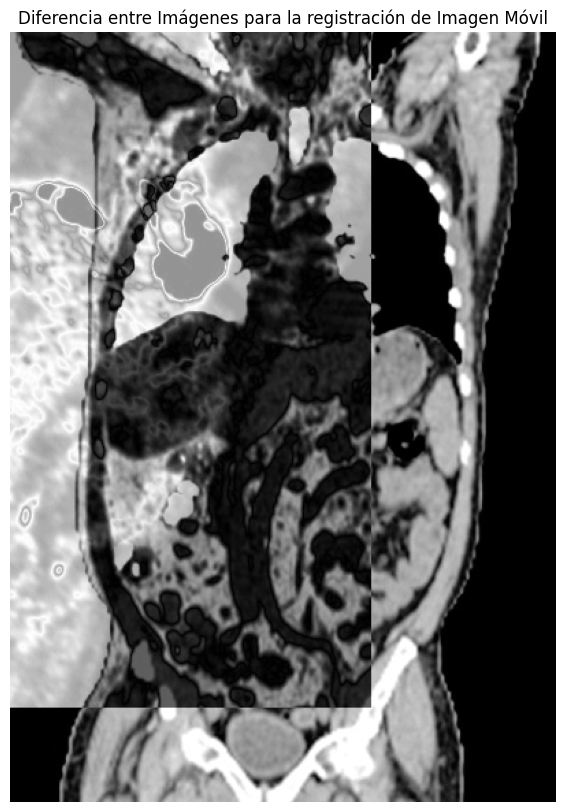

SSIM: 0.2290
MSE: 87.4237
PSNR: 66.1176


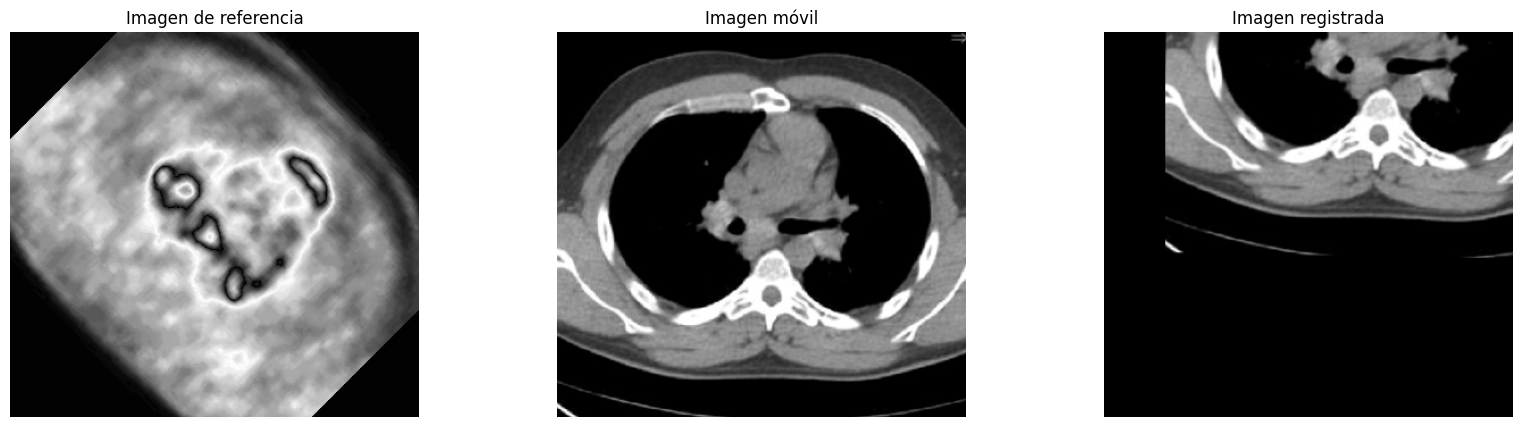

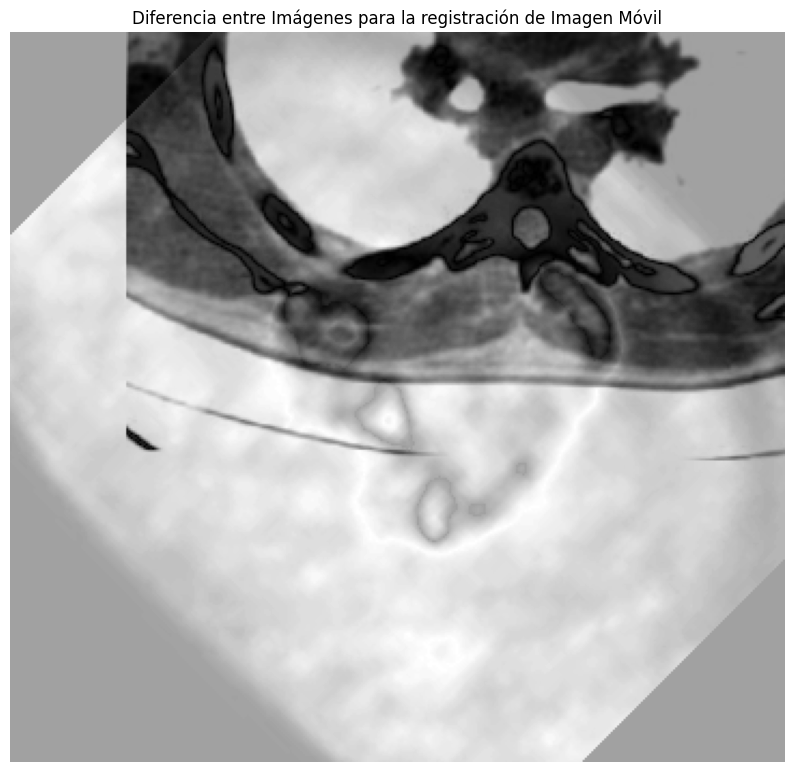

SSIM: 0.0658
MSE: 106.0824
PSNR: 64.1831


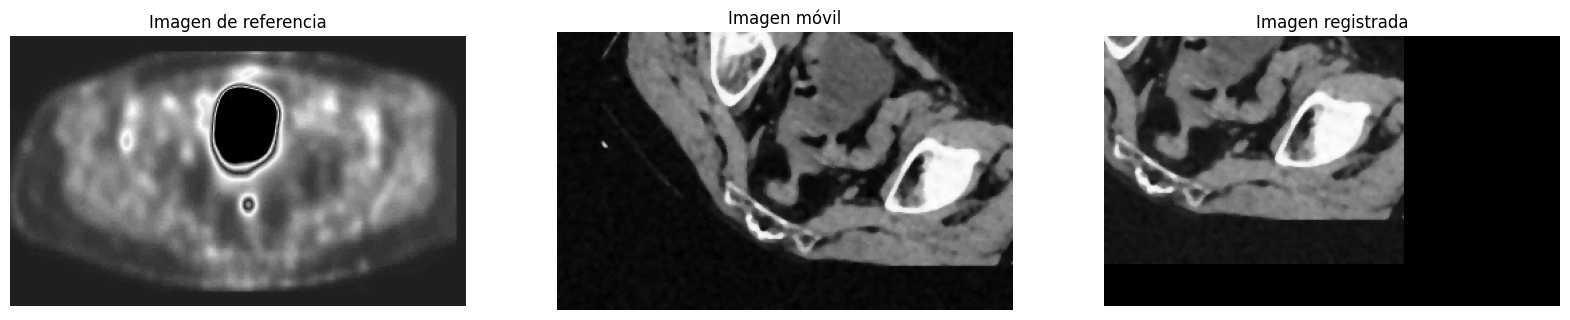

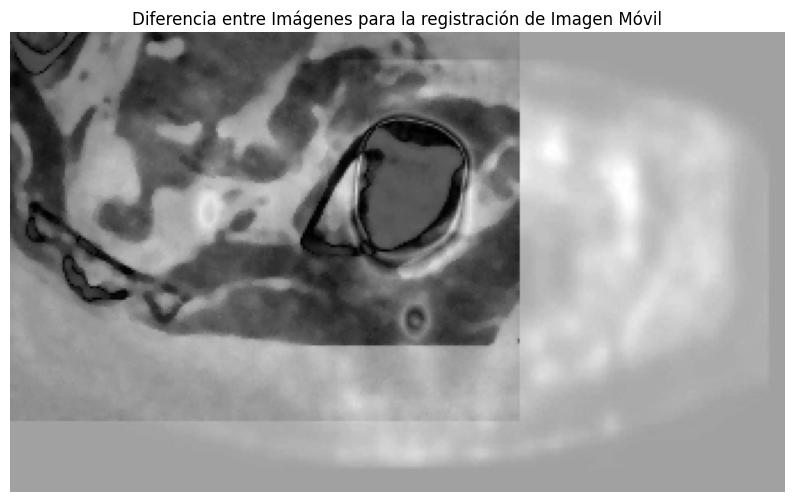

SSIM: 0.1059
MSE: 111.6143
PSNR: 63.6748


In [52]:
for im1, im2 in img_raw_pairs:
    reg = Registracion(im1, im2, modo='intensidad')
    reg.registracion_CCN()
    reg.plot_registracion()
    reg.calcular_metricas()

## Registración basada en MI

Información Mutua inicial: 0.128886
differential_evolution step 1: f(x)= -0.20656224501836387
differential_evolution step 2: f(x)= -0.25404535677142265
differential_evolution step 3: f(x)= -0.25404535677142265
differential_evolution step 4: f(x)= -0.25404535677142265
differential_evolution step 5: f(x)= -0.25404535677142265
differential_evolution step 6: f(x)= -0.25404535677142265
differential_evolution step 7: f(x)= -0.2707185835413964
differential_evolution step 8: f(x)= -0.2707185835413964
differential_evolution step 9: f(x)= -0.2749613140539774
differential_evolution step 10: f(x)= -0.2749613140539774
differential_evolution step 11: f(x)= -0.2749613140539774
differential_evolution step 12: f(x)= -0.27732364807814397
differential_evolution step 13: f(x)= -0.27732364807814397
differential_evolution step 14: f(x)= -0.2799859776410503
differential_evolution step 15: f(x)= -0.2799859776410503
differential_evolution step 16: f(x)= -0.28041477155896805
differential_evolution step 17: f(x)

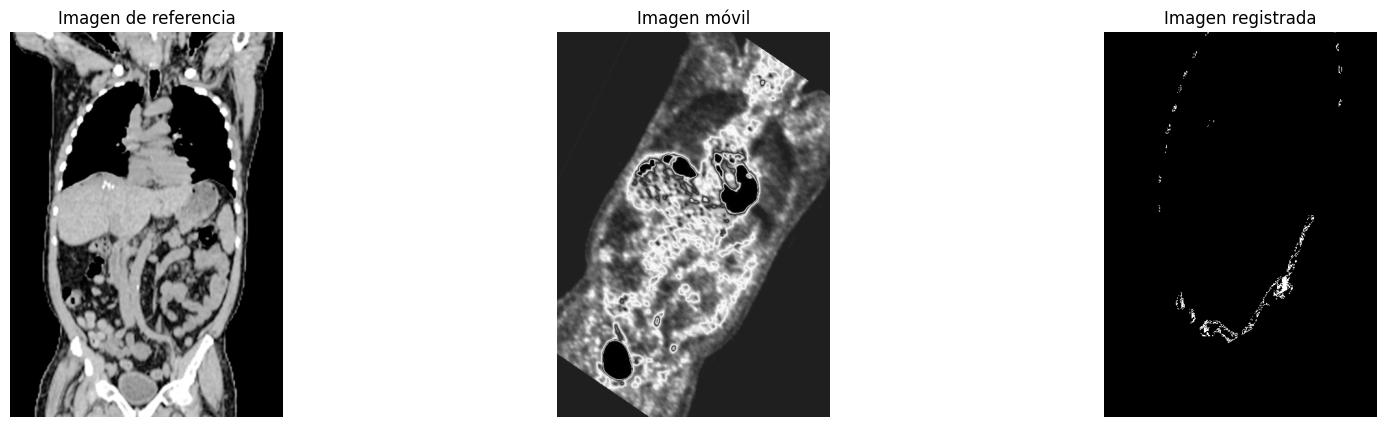

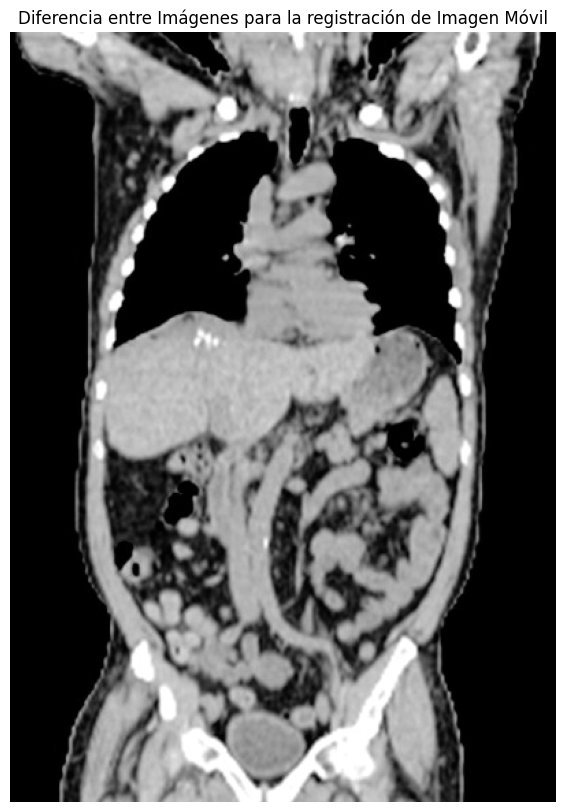

SSIM: 0.3041
MSE: 69.4775
PSNR: 68.4152
Información Mutua inicial: 0.200812
differential_evolution step 1: f(x)= -0.21588709588660074
differential_evolution step 2: f(x)= -0.22402974257758615
differential_evolution step 3: f(x)= -0.22402974257758615
differential_evolution step 4: f(x)= -0.24983280324288043
differential_evolution step 5: f(x)= -0.24983280324288043
differential_evolution step 6: f(x)= -0.2810581988441349
differential_evolution step 7: f(x)= -0.29459312929179515
differential_evolution step 8: f(x)= -0.29459312929179515
differential_evolution step 9: f(x)= -0.29459312929179515
differential_evolution step 10: f(x)= -0.29459312929179515
differential_evolution step 11: f(x)= -0.29459312929179515
differential_evolution step 12: f(x)= -0.29459312929179515
differential_evolution step 13: f(x)= -0.29459312929179515
differential_evolution step 14: f(x)= -0.29459312929179515
differential_evolution step 15: f(x)= -0.29459312929179515
differential_evolution step 16: f(x)= -0.29934792

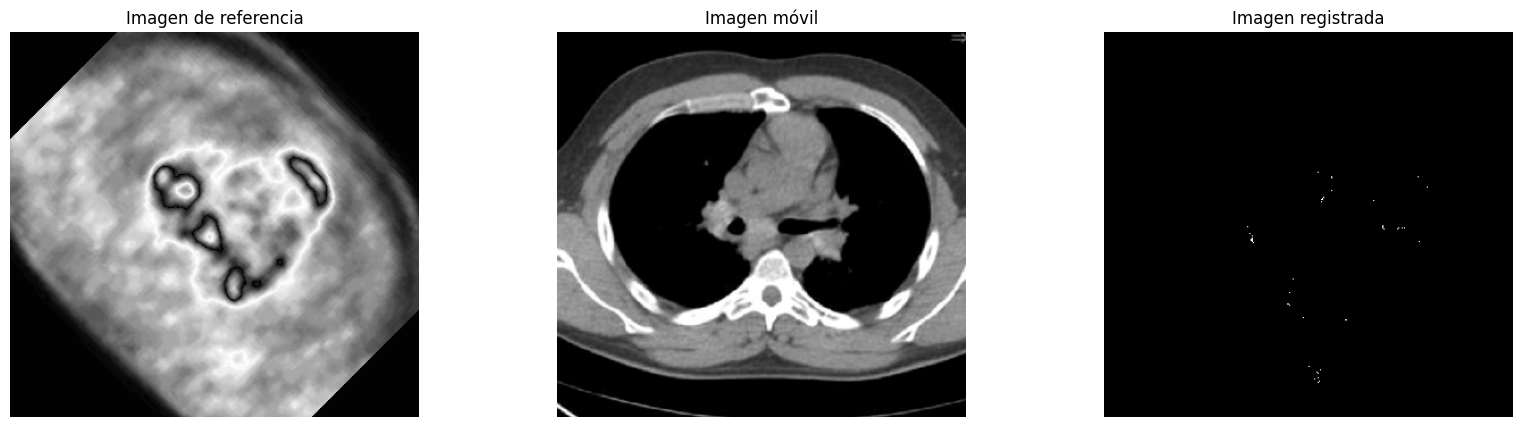

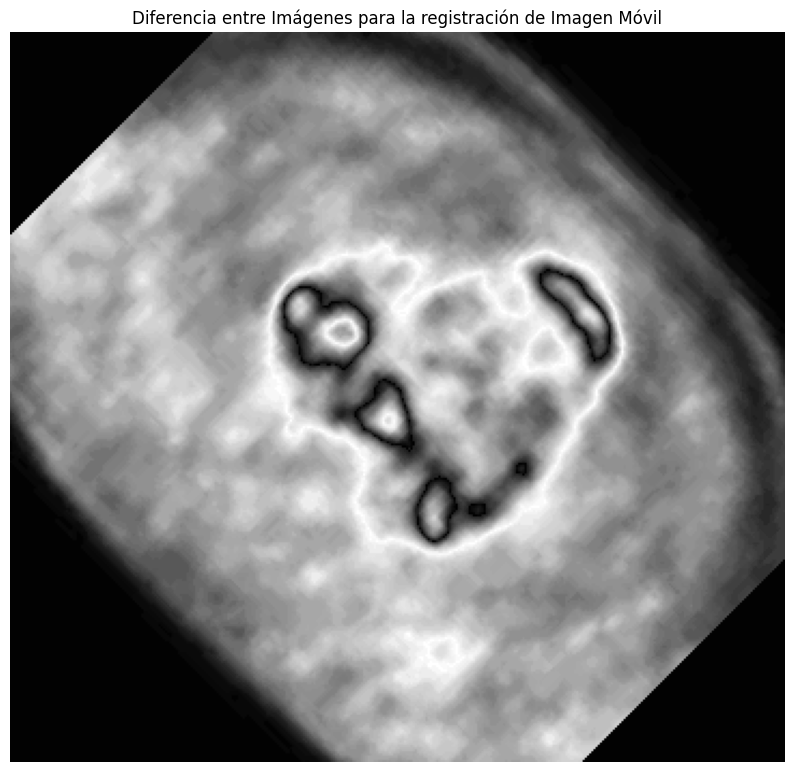

SSIM: 0.0001
MSE: 106.3812
PSNR: 64.1550
Información Mutua inicial: 0.432847
differential_evolution step 1: f(x)= -0.6184335766218371
differential_evolution step 2: f(x)= -0.6184335766218371
differential_evolution step 3: f(x)= -0.6184335766218371
differential_evolution step 4: f(x)= -0.6387394500553185
differential_evolution step 5: f(x)= -0.6387394500553185
differential_evolution step 6: f(x)= -0.6761488698118377
differential_evolution step 7: f(x)= -0.6761488698118377
differential_evolution step 8: f(x)= -0.6761488698118377
differential_evolution step 9: f(x)= -0.6847404829028978
differential_evolution step 10: f(x)= -0.6984819528274538
differential_evolution step 11: f(x)= -0.6984819528274538
differential_evolution step 12: f(x)= -0.6998253213168234
differential_evolution step 13: f(x)= -0.6998253213168234
differential_evolution step 14: f(x)= -0.7010015247159307
differential_evolution step 15: f(x)= -0.7010015247159307
differential_evolution step 16: f(x)= -0.7095130893617458
diff

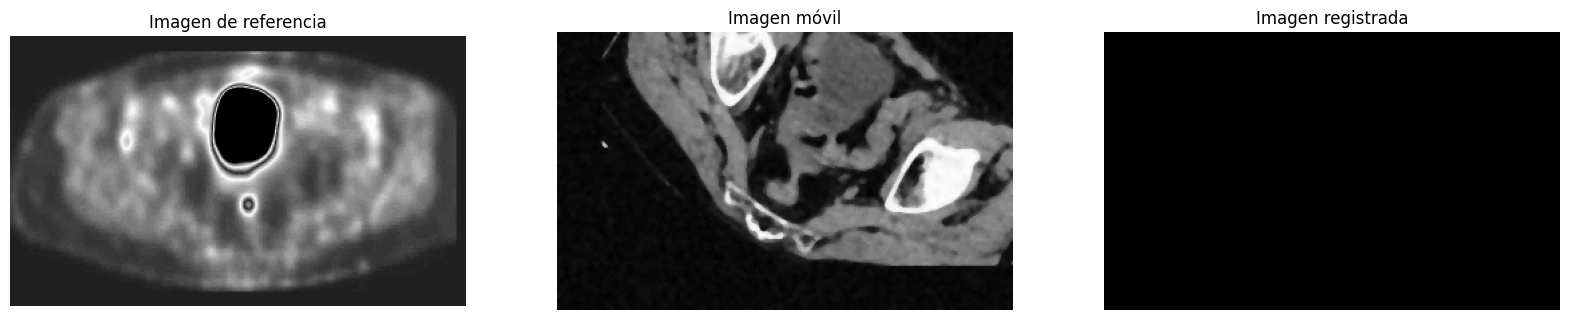

OpenCV(4.10.0) /io/opencv/modules/core/src/arithm.cpp:658: error: (-209:Sizes of input arguments do not match) The operation is neither 'array op array' (where arrays have the same size and the same number of channels), nor 'array op scalar', nor 'scalar op array' in function 'arithm_op'



<Figure size 1000x1000 with 0 Axes>

In [37]:
for im1, im2 in img_raw_pairs:
    try:
        reg = Registracion(im1, im2, modo='intensidad')
        reg.registracion_IM()
        reg.plot_registracion()
        reg.calcular_metricas()
    except Exception as e:
        print(e)
        continue

## Conclusiones

A pesar de mis mayores intentos, no hubo manera de registrar adecuadamente ninguna imagen con ninguno de los métodos sugeridos. Evidentemente, el trabajo previo de reducción de ruido no fue suficiente.